## OLS: Ordinary Linear Least Square

In [1]:
# 데이터
import pandas as pd

data = {'x': [1., 2., 3., 4., 5.], 'y': [1., 3., 4., 6., 5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [2]:
# 가설 확립
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y ~ x', data=df).fit()

In [3]:
lm_model.params # 결과 

Intercept    0.5
x            1.1
dtype: float64

- y절편 = 0.5, x의 기울기 = 1.1

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

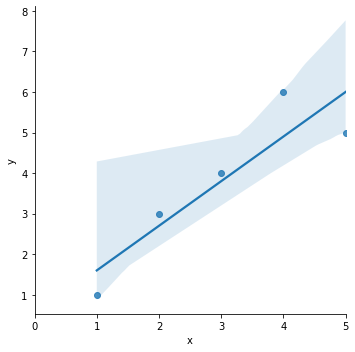

In [7]:
# plot 생성
sns.lmplot(x='x', y='y', data=df)
plt.xlim([0, 5]);

### 잔차 평가 residue
- 잔차는 평균이 0인 정규분포를 따르는 것이어야 함
- 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는 지 확인

In [8]:
# 잔차 확인
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

### 결정계수 R-Squared
- y_hat은 예측된 값
- 예측 값과 실제 값(y)이 일치하면 결정계수는 1이 됨 (즉 결정계수가 높을 수록 좋은 모델)

In [9]:
# numpy로 직접 결정계수 계산
import numpy as np

mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()
np.sum( (yhat - mu) ** 2 ) / np.sum( (y - mu) ** 2 ) 

0.8175675675675671

In [10]:
# 함수 이용
lm_model.rsquared

0.8175675675675677